In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston/Boston.csv


In [2]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2列目以降のデータを X に、1列目のデータを y に格納
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# 平均と標準偏差を用いて標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
# 共分散行列を作成
cov_mat = np.cov(X_train_std.T)
# 固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.78020531 2.413934   1.60264394 0.95937723 0.85091699 0.65730521
 0.52466846 0.35170478 0.30160286 0.10412565 0.20276634 0.16757739
 0.18165669]


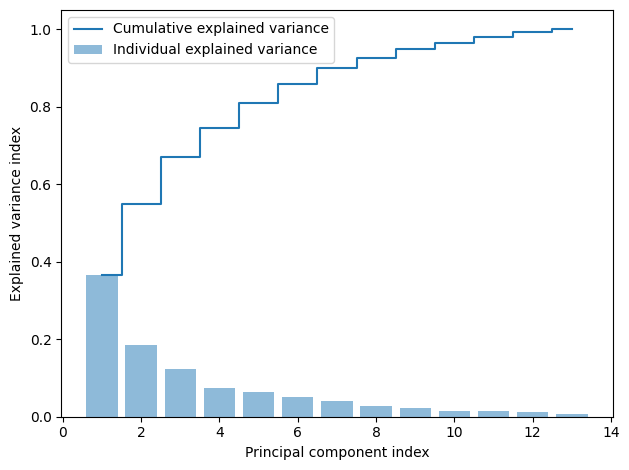

In [5]:
# 固有値を合計
tot = sum(eigen_vals)

# 分散説明率を計算
var_exp = [ (i / tot) for i in sorted(eigen_vals, reverse=True)]

# 分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

# 分散説明率の棒グラフを作成
plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')

# 分散説明率の累積和の階段グラフを作成
plt.step(range(1,14), cum_var_exp, where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance index')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
# (固有値, 固有ベクトル) のタブルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
              for i in range(len(eigen_vals))]

# (固有値, 固有ベクトル)のタプルを大きいものから順に並び替え
eigen_pairs.sort(key=lambda k: k[0], reverse=True)